<a href="https://colab.research.google.com/github/Usamah-Abdullateef/Air-Pollution_-Data-Analysis/blob/main/Data_Analysis_test_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install streamlit
import pandas as pd
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.1 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
!ls "/content/drive/MyDrive/"

'1 Application for Accommodation.docx'
 4BAF0ADA-F8D5-4D51-A95C-E6E95C65DAB5.jpeg
 5AA12335-592D-44CC-9189-6B376A411169.jpeg
 Academic_tutor_Cover_Letter.gdoc
'Account Access Request Form.docx'
'Account Access Request Form.gdoc'
'AI_ Certificate.gdoc'
'AlgocellsMedical Form (2).gdoc'
'AlgocellsMedical Form (2).pdf'
'Assessment Data-20250512'
'AUDIT OF BUSLA WEBSITES.docx'
'BRP_card_front (1).jpg'
 BRP_card_front.jpg
'Business letter (1).gdoc'
'Business letter.gdoc'
 C09F822F-DDA5-426F-8346-A67322CF26F0.jpeg
 chinadatasets
'Coders Creed (2).pptx'
'Colab Notebooks'
'Copy of 10 Competitive Analysis Templates – HubSpot .gsheet'
'Copy of 1 Application for Accommodation.docx'
'Cover Letter_Acculink_Technology.gdoc'
'djx-ibuu-yzf – 27 Nov 2023.gjam'
'djx-ibuu-yzf – 27 Nov 2023.pdf'
'Getting started.pdf'
'grf-syxc-pjg – 27 May 2024.gjam'
'grf-syxc-pjg – 27 May 2024.pdf'
'Letter (1).gdoc'
 Letter.gdoc
'Personal_Statement_PhD_in Stiffness-Adjustable Robotic Systems for On-Wing Aero-Engine Repair

In [5]:
#Aotizhongxin is urban
#Changping is Suburban/Rural
#Gucheng is Surburban
#Shunyi is Suburban/Industrial
#Nongzhanguan is Urban
%cd "/content/drive/MyDrive/chinadatasets"

/content/drive/MyDrive/chinadatasets


In [6]:
%ls

app.py
combined_output.csv
pm25_rf_model.pkl
PRSA_Data_Aotizhongxin_20130301-20170228.csv
PRSA_Data_Changping_20130301-20170228.csv
PRSA_Data_Gucheng_20130301-20170228.csv
PRSA_Data_Nongzhanguan_20130301-20170228.csv
PRSA_Data_Shunyi_20130301-20170228.csv
scaler.pkl


In [7]:
import pandas as pd
import glob

In [8]:
# Get all CSV files in the folder
csv_files = glob.glob("/content/drive/MyDrive/chinadatasets/*.csv")

# Read and combine all CSV files
combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# Save to a new CSV file
combined_df.to_csv("combined_output.csv", index=False)

print("All CSV files have been merged into 'combined_output.csv'.")

All CSV files have been merged into 'combined_output.csv'.


In [8]:
df = pd.read_csv('combined_output.csv')
df.head()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [9]:
df.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
1227235,35060,2017,2,28,19,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8,Shunyi
1227236,35061,2017,2,28,20,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5,Shunyi
1227237,35062,2017,2,28,21,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7,Shunyi
1227238,35063,2017,2,28,22,18.0,20.0,9.0,33.0,500.0,59.0,7.1,1015.2,-13.2,0.0,WNW,1.8,Shunyi
1227239,35064,2017,2,28,23,15.0,22.0,13.0,34.0,500.0,60.0,7.4,1014.9,-11.9,0.0,N,1.4,Shunyi


In [10]:
df.shape

(1227240, 18)

In [12]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227240 entries, 0 to 1227239
Data columns (total 18 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   No       1227240 non-null  int64  
 1   year     1227240 non-null  int64  
 2   month    1227240 non-null  int64  
 3   day      1227240 non-null  int64  
 4   hour     1227240 non-null  int64  
 5   PM2.5    1200038 non-null  float64
 6   PM10     1208557 non-null  float64
 7   SO2      1200556 non-null  float64
 8   NO2      1196335 non-null  float64
 9   CO       1170666 non-null  float64
 10  O3       1191911 non-null  float64
 11  TEMP     1225875 non-null  float64
 12  PRES     1225903 non-null  float64
 13  DEWP     1225854 non-null  float64
 14  RAIN     1225945 non-null  float64
 15  wd       1220653 non-null  object 
 16  WSPM     1226141 non-null  float64
 17  station  1227240 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 168.5+ MB


In [11]:
stations = df['station'].value_counts()
print(f'Total number of stations in the dataset : {len(stations)}')
stations

Total number of stations in the dataset : 5


,count
station,
Changping,245448
Gucheng,245448
Shunyi,245448
Aotizhongxin,245448
Nongzhanguan,245448


In [15]:
# Missing Values
def missing_values_table(df):
      # Total missing values
         mis_val = df.isnull().sum()

      # Percentage of missing values
         mis_val_percent = 100 * df.isnull().sum() / len(df)

      # Make a table with the results
         mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
         print(mis_val_table)

        # Rename the columns
         mis_val_table_ren_columns = mis_val_table.rename(
         columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
         mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values(
         '% of Total Values', ascending=False)

        # Return the dataframe with missing information
         return mis_val_table_ren_columns

missing_values= missing_values_table(df)
missing_values.style.background_gradient(cmap='Oranges')

             0         1
No           0  0.000000
year         0  0.000000
month        0  0.000000
day          0  0.000000
hour         0  0.000000
PM2.5    27202  2.216518
PM10     18683  1.522359
SO2      26684  2.174310
NO2      30905  2.518252
CO       56574  4.609856
O3       35329  2.878736
TEMP      1365  0.111225
PRES      1337  0.108944
DEWP      1386  0.112936
RAIN      1295  0.105521
wd        6587  0.536733
WSPM      1099  0.089551
station      0  0.000000


,Missing Values,% of Total Values
CO,56574,4.609856
O3,35329,2.878736
NO2,30905,2.518252
PM2.5,27202,2.216518
SO2,26684,2.174310
PM10,18683,1.522359
wd,6587,0.536733
DEWP,1386,0.112936
TEMP,1365,0.111225
PRES,1337,0.108944


In [12]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Shape: (1227240, 18)

Data Types:
 No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

Missing Values:
 No             0
year           0
month          0
day            0
hour           0
PM2.5      27202
PM10       18683
SO2        26684
NO2        30905
CO         56574
O3         35329
TEMP        1365
PRES        1337
DEWP        1386
RAIN        1295
wd          6587
WSPM        1099
station        0
dtype: int64


In [13]:

# Remove duplicate rows
merged_df = df.drop_duplicates()

# Handle missing values: fill numeric columns with their mean
numeric_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns
merged_df[numeric_cols] = merged_df[numeric_cols].fillna(merged_df[numeric_cols].mean())

# Drop rows where categorical column 'wd' is still missing
merged_df = merged_df.dropna(subset=['wd'])

# Create a unified datetime column
merged_df['datetime'] = pd.to_datetime(merged_df[['year', 'month', 'day', 'hour']])
merged_df = merged_df.drop(columns=['No', 'year', 'month', 'day', 'hour'])

# Encode wind direction as numerical codes
merged_df['wd'] = merged_df['wd'].astype('category').cat.codes

# Reorder columns (datetime first)
cols = ['datetime'] + [col for col in merged_df.columns if col != 'datetime']
merged_df = merged_df[cols]


<ipython-input-13-0717ebd557a4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df[numeric_cols] = merged_df[numeric_cols].fillna(merged_df[numeric_cols].mean())


<Axes: xlabel='PM2.5', ylabel='Count'>

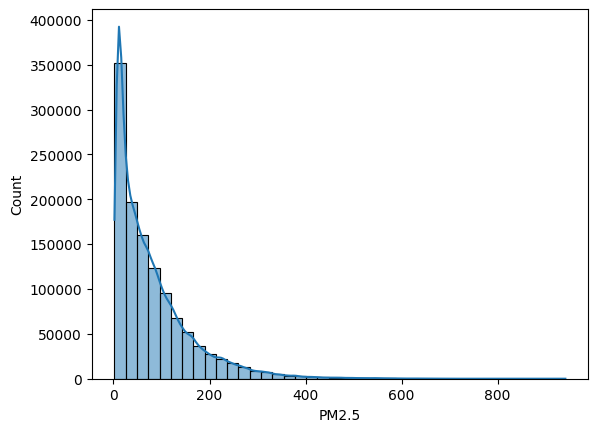

In [14]:
sns.histplot(df['PM2.5'], bins=40, kde=True)


<Axes: xlabel='TEMP', ylabel='PM2.5'>

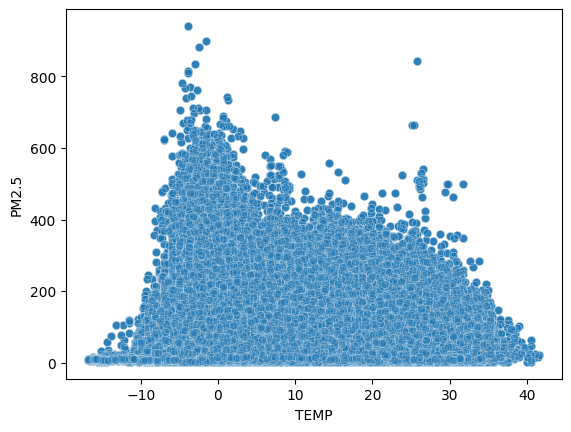

In [15]:
sns.scatterplot(df, x='TEMP', y='PM2.5', alpha=0.3)


<ipython-input-17-4d4c6f3d11b6>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_pm25 = merged_df.set_index('datetime').resample('M')['PM2.5'].mean()


<Axes: xlabel='datetime'>

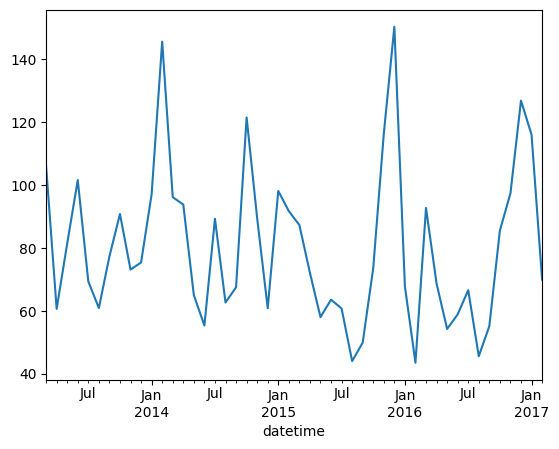

In [17]:
monthly_pm25 = merged_df.set_index('datetime').resample('M')['PM2.5'].mean()
monthly_pm25.plot()